### Part one: use synthetic graphs

In the first part, you can use some graphs obtained by using the networx library or the library of your choice.

For each selected graph (max 2 or 3) you can perform different types of attack: turn off nodes at random, turn off the highest degree nodes, those with the highest pagerank, those with the highest clustering coefficient, ...

After each removal, compute new measures, for example the size of the giant component or the diameter of the network and then plot these measures with respect to node failures.

Be careful, some of the networkx functions you will use work only for undirected, connected graphs and therefore you need to instrument your code to work on the entire graph first, and on the several components after the split of the original graph into smaller clusters.

Il notebook è lento perché ogni volta che viene rimosso un nodo vengono ricalcolate le varie statistiche come il nodo con maggior degree. Questo perché tenere una "classifica" a priori in alcuni casi potrebbe anche dare soluzioni corrette, ma in generale è sbagliato.


In [1]:
import networkx
#graph = networkx.read_edgelist("../graphs/p2p-Gnutella31.txt")
#graph = networkx.read_edgelist("../graphs/power-grid.txt")
graph = networkx.gnp_random_graph(200, 0.1)


In [2]:
# Import functions
import random
import operator


def get_highest_degree_node(G):
    return sorted(G.degree, key=lambda x: x[1], reverse=True)[0][0]

def get_random_node(G):
    list_of_nodes = G.nodes()
    return random.sample(list_of_nodes, 1)[0]

def get_highest_closeness_node(G):
    return sorted(networkx.closeness_centrality(G).items(), key=operator.itemgetter(1),reverse=True)[0][0]

def get_highest_betwennes_node(G):
    return sorted(networkx.betweenness_centrality(G).items(), key=operator.itemgetter(1),reverse=True)[0][0]

def get_highest_clustering_node(G):
    return sorted(networkx.clustering(G).items(), key=operator.itemgetter(1),reverse=True)[0][0]

def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)
def get_giant_component_size(G):
    return len(sorted(connected_component_subgraphs(G), key=len, reverse=True)[0])

In [3]:
# Analyze relative giant component size (relative to the starting graph size)

# Saving inital graph' size
n_nodes = len(graph)

# Creating list variable to iterate
graphs = []
sizes = []
functions = []

# One graph copy and one array of data for each tecnique
random_graph = graph.__class__(graph)
random_giant_sizes = []
graphs.append(random_graph)
sizes.append(random_giant_sizes)
functions.append(get_random_node)

degree_graph = graph.__class__(graph)
degree_giant_sizes = []
graphs.append(degree_graph)
sizes.append(degree_giant_sizes)
functions.append(get_highest_degree_node)

closeness_graph = graph.__class__(graph)
closeness_giant_sizes = []
graphs.append(closeness_graph)
sizes.append(closeness_giant_sizes)
functions.append(get_highest_closeness_node)

betweenness_graph = graph.__class__(graph)
betweenness_giant_sizes = []
graphs.append(betweenness_graph)
sizes.append(betweenness_giant_sizes)
functions.append(get_highest_betwennes_node)


clustering_graph = graph.__class__(graph)
clustering_giant_sizes = []
graphs.append(clustering_graph)
sizes.append(clustering_giant_sizes)
functions.append(get_highest_clustering_node)


for i in range(len(graphs)):
        sizes[i].append(get_giant_component_size(graphs[i]) / n_nodes)

for _ in range(len(graph) - 1):
    # Per ogni tipo di attacco
    for i in range(len(graphs)):
        node_to_remove = functions[i](graphs[i])
        graphs[i].remove_node(node_to_remove)
        sizes[i].append(get_giant_component_size(graphs[i]) / n_nodes)

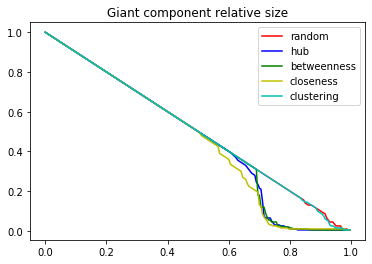

In [4]:
# Plotting size results
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 1, 1.0/len(graph))

legends = ["random", "hub", "betweenness", "closeness", "clustering"]
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k']

for i in range(len(sizes)): 
    plt.plot(x, sizes[i], colors[i], label=legends[i])

plt.title("Giant component relative size")
plt.legend()
plt.show()

In [13]:
# Analyze diameter 
def get_diameter(G):
    components = sorted(connected_component_subgraphs(G), key=len, reverse=True)
    # Se la grandezza del giant component è piu piccola del resto del grafo allora è inutile calcolare il diametro
    if len(components[0]) < len(G) - len(components[0]):
        return False
    return networkx.diameter(components[0])

# Creating list variable to iterate
graphs = []
diameters = []
functions = []

# One graph copy and one array of data for each tecnique
random_graph = graph.__class__(graph)
random_giant_diameters = []
graphs.append(random_graph)
diameters.append(random_giant_diameters)
functions.append(get_random_node)

degree_graph = graph.__class__(graph)
degree_giant_diameters = []
graphs.append(degree_graph)
diameters.append(degree_giant_diameters)
functions.append(get_highest_degree_node)

closeness_graph = graph.__class__(graph)
closeness_giant_diameters = []
graphs.append(closeness_graph)
diameters.append(closeness_giant_diameters)
functions.append(get_highest_closeness_node)

betweenness_graph = graph.__class__(graph)
betweenness_giant_diameters = []
graphs.append(betweenness_graph)
diameters.append(betweenness_giant_diameters)
functions.append(get_highest_betwennes_node)


clustering_graph = graph.__class__(graph)
clustering_giant_diameters = []
graphs.append(clustering_graph)
diameters.append(clustering_giant_diameters)
functions.append(get_highest_clustering_node)

# A causa della complessita computazione del calcolo del diametro non possiamo provarlo troppe volte, calcolo solo 3 volte
# Il diametro è in percentuale al numero di nodi: 100%: devo attraversare tutti i nodi , 1% devo attraversare l'1% dei nodi per raggiungere ogni altro nodo del giant component

initial_diameter = get_diameter(graphs[i]) / len(graphs[i])

for i in range(len(graphs)):
        diameters[i].append(initial_diameter)

for j in range(len(graph) - 1):
    # Per ogni tipo di attacco
    end = False
    for i in range(len(graphs)):
        node_to_remove = functions[i](graphs[i])
        graphs[i].remove_node(node_to_remove)
        # Qui decido quando computare il diametro
        if (j + 1) % 35 == 0:
            diameter = get_diameter(graphs[i])
            if diameter != False: 
                diameters[i].append(diameter / len(graphs[i]))
            else:
                # Se è inutile calcolare il diametro termino
                diameters[i].append(1)
                end = True
    if end:
        break

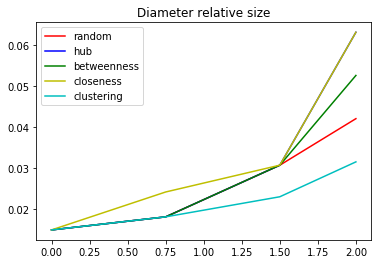

In [14]:
# Plotting diameter results

x = [0, 0.75, 1.50, 2]

legends = ["random", "hub", "betweenness", "closeness", "clustering"]
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k']

for i in range(len(diameters)): 
    # Rimuovo dai diametri l'ultimo elemento perché non ha valore
    plt.plot(x, diameters[i][:-1], colors[i], label=legends[i])

plt.title("Diameter relative size")
plt.legend()
plt.show()

In [12]:
print(diameters)

[[0.015, 0.01818181818181818, 0.023076923076923078, 0.042105263157894736, 0.08333333333333333], [0.015, 0.01818181818181818, 0.03076923076923077, 0.06315789473684211, 0.4], [0.015, 0.01818181818181818, 0.03076923076923077, 0.05263157894736842, 0.25], [0.015, 0.024242424242424242, 0.03076923076923077, 0.06315789473684211], [0.015, 0.01818181818181818, 0.023076923076923078, 0.031578947368421054, 0.06666666666666667]]
